<a href="https://colab.research.google.com/github/samz5320/dollar_tasks/blob/main/Intern_Data_Analyst_Tasks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#q1 Standardise the mail_sent_date column values to YYYY-MM-DD standard date format




In [116]:
#q1
import pandas as pd
email_df=pd.read_excel("/content/Emails sent.xlsx")

email_df["mail_sent_date"] = pd.to_datetime(email_df["mail_sent_date"]).dt.strftime('%Y-%m-%d')

email_df["mail_sent_date"].head(10)

0    2009-05-22
1    2010-04-17
2    2012-01-26
3    2014-11-15
4    2014-07-17
5    2010-02-22
6    2010-07-17
7    2012-10-27
8    2014-01-18
9    2010-01-11
Name: mail_sent_date, dtype: object

#q2 In which Year maximum number of emails were sent to doctors? 

In [319]:
#q2
count=pd.to_datetime(email_df['mail_sent_date']).dt.year.value_counts()
print(count)

2014    32
2015    31
2019    25
2016    25
2010    25
2018    23
2013    21
2011    20
2012    16
2007    15
2009    14
2017    11
2008     8
2020     5
2006     1
Name: mail_sent_date, dtype: int64


#q3 Write a query to get total fine paid per Office

In [104]:
#q3
fine_per_office=new_df.groupby(["org_indiv"]).sum().sort_values("new_fine")
fine_per_office.head()

,new_fine
org_indiv,
"JOSEPH SOLOMKIN, M.D.",500.0
RICHARD A RENZA DO PA,500.0
"MASRI, ADDAM",500.0
"HOFFMAN, JOHN MALCOLM",500.0
"FIDONE, JEFFREY W",500.0


In [105]:
len(new_df["org_indiv"].unique())

4851

#q4 Write a query to get the highest total fine and lowest total fine paid per state

In [115]:
#4
df.groupby("state").agg(
    s_min=pd.NamedAgg(column="new_fine", aggfunc="min"),
    s_max=pd.NamedAgg(column="new_fine", aggfunc="max"))



,s_min,s_max
state,,
AK,1750.0,1750.0
AL,26.0,232991.0
AR,26.0,77670.0
AZ,26.0,151642.0
CA,25.0,323122.0
CO,31.0,282565.0
CT,25.0,132853.0
DC,25.0,62000.0
DE,36.0,19750.0


#q5 Write a query to get the least 2 states that had to pay minimum 'online' fine 

In [159]:
#5
df_min=df.groupby("state").agg(
    s_min=pd.NamedAgg(column=" online_fine ", aggfunc="sum"))

df_min.sort_values(by="s_min",ascending=True)

,s_min
state,
AK,0.0
ND,321.0
ME,3006.0
MT,3108.0
VT,3235.0
WY,3337.0
NM,3955.0
DE,4440.0
ID,4681.0


#q6 Write a SQL query to find the number of doctors that contributed to the state having highest 'cash' fine


In [128]:
      pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26781 sha256=dfd68d1207997207105e43fdca50bc173f4ca7f99938b342504ea1584effefe6
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [261]:
#6
import pandasql as ps
import pandas as pd
dfsql=df.drop(labels=["new_fine"],axis=1)
dfsql["cash_fine"]=df[" cash_fine "]

dfsql=dfsql.drop(labels=[' cash_fine '],axis=1)
dfsql
#q1 = """select count(*), state from dfsql where (select distinct state GROUP BY "state" ORDER BY sum("cash_fine") DESC);"""
q2="""select count(*) as doctors,state from (select distinct first_name,last_name,state from dfsql group by state order by sum(cash_fine));"""
#print(ps.sqldf(q1, locals()))
print(ps.sqldf(q2, locals()))


   doctors state
0       52    CA


In [258]:
#verifying
df_max=df.groupby("state").agg(
    s_min=pd.NamedAgg(column=" cash_fine ", aggfunc="sum"))

df_max.sort_values(by="s_min",ascending=False)

,s_min
state,
CA,4331517.0
TX,2587047.0
FL,2400881.0
PA,2376131.0
NC,2229157.0
NY,1840412.0
MA,1605375.0
IL,1165328.0
MI,1068920.0


#q7Get the top 5 average fine paid per state and category

In [264]:
#q7 method1
top_paid=new_df.groupby(["state","category"]).mean().sort_values("new_fine", ascending=False)
top_paid.head(5)

,,new_fine
state,category,
UT,"Infosys Sponsored Research initiated before July 1, 2009",224997.000000
OR,"Infosys Sponsored Research initiated before July 1, 2009",186490.000000
FL,"Infosys Sponsored Research initiated on or after July 1, 2009",181115.571429
TN,"Infosys Sponsored Research initiated on or after July 1, 2009",177786.000000
PA,Investigator-Initiated Research,150778.000000


In [269]:
#q7 method 2
top_paid2=df.groupby(["state","category"]).agg(
    s_mean=pd.NamedAgg(column="new_fine", aggfunc="mean"))

top_paid2.sort_values(by="s_mean",ascending=False)

,,s_mean
state,category,
UT,"Infosys Sponsored Research initiated before July 1, 2009",224997.000000
OR,"Infosys Sponsored Research initiated before July 1, 2009",186490.000000
FL,"Infosys Sponsored Research initiated on or after July 1, 2009",181115.571429
TN,"Infosys Sponsored Research initiated on or after July 1, 2009",177786.000000
PA,Investigator-Initiated Research,150778.000000
...,...,...
KY,Educational Items,57.000000
TN,Educational Items,54.166667
MS,Educational Items,49.285714


#Preprocessing inital

In [87]:

import pandas as pd
df=pd.read_csv("/content/Fines paid  by doctors.csv")


In [88]:
cash_fine=pd.Series(df[" cash_fine "])
online_fine=pd.Series(df[" online_fine "])

In [89]:
cash_fine=pd.to_numeric(cash_fine.replace("[^0-9\.]","",regex=True),errors='coerce')
online_fine=pd.to_numeric(online_fine.replace("[^0-9\.]","",regex=True),errors='coerce')
df[" cash_fine "]=cash_fine
df[" online_fine "]=online_fine

In [90]:
df[" cash_fine "]

0        2625.0
1        1000.0
2           NaN
3           NaN
4        1800.0
          ...  
10082    1750.0
10083       NaN
10084       NaN
10085    2000.0
10086       NaN
Name:  cash_fine , Length: 10087, dtype: float64

In [91]:
df[" cash_fine "]=df[" cash_fine "].fillna(0)
df[" online_fine "]=df[" online_fine "].fillna(0)


In [92]:
df.head()

,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0


In [93]:
df["new_fine"]=df[" cash_fine "]+df[" online_fine "]
new_df=df
df["new_fine"]=df[" cash_fine "]+df[" online_fine "]
new_df=df
new_df.head()


,org_indiv,first_name,last_name,city,state,category,cash_fine,online_fine,new_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0,0.0,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0,0.0,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,0.0,448.0,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,0.0,119.0,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0,0.0,1800.0


In [94]:
new_df=new_df.drop(labels=[" cash_fine "," online_fine "],axis=1)

In [95]:
new_df.head()

,org_indiv,first_name,last_name,city,state,category,new_fine
0,3-D MEDICAL SERVICES LLC,STEVEN,DEITELZWEIG,NEW ORLEANS,LA,Professional Advising,2625.0
1,"AA DOCTORS, INC.",AAKASH,AHUJA,PASO ROBLES,CA,Expert-Led Forums,1000.0
2,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Business Related Travel,448.0
3,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Meals,119.0
4,"ABBO, LILIAN MARGARITA",LILIAN,ABBO,MIAMI,FL,Professional Advising,1800.0


#EDA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


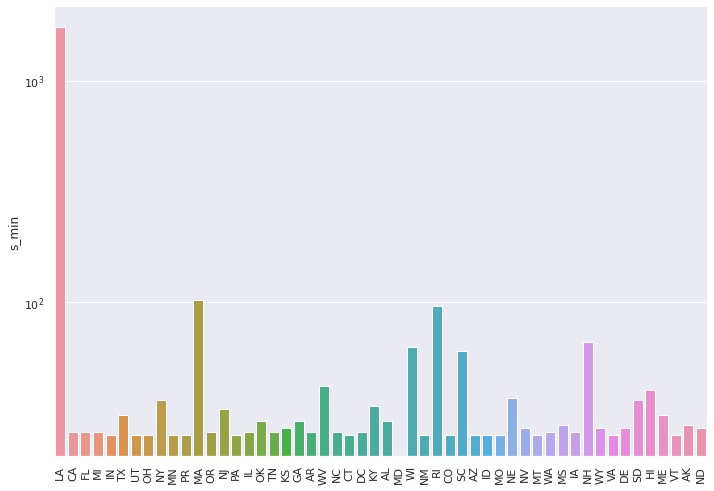

In [361]:
import seaborn as sns
total_low_hi=df.groupby("state").agg(
    s_min=pd.NamedAgg(column="new_fine", aggfunc="min"),
    s_max=pd.NamedAgg(column="new_fine", aggfunc="max"))
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(new_df["state"].unique(),total_low_hi["s_min"],log=True)
plt.xticks(rotation=90)
sns.set_style("white")



